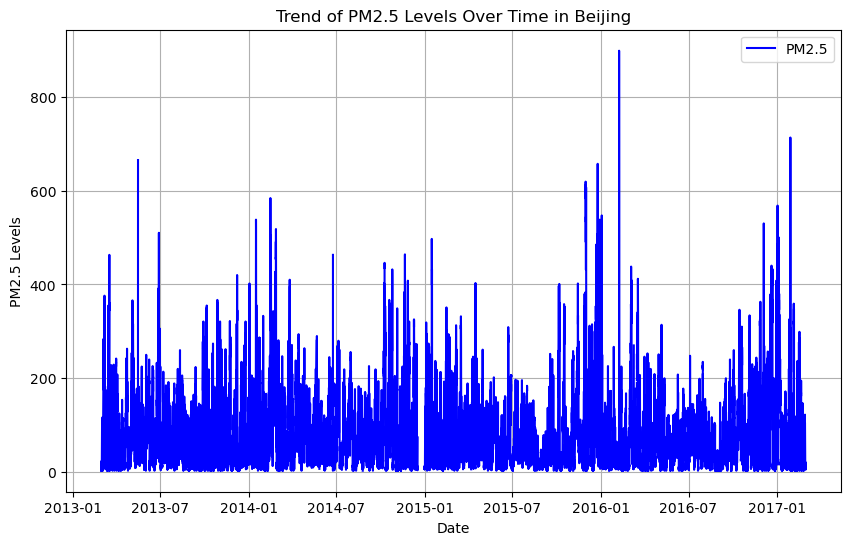

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Beijing air quality dataset
beijing_data = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')

# Convert date columns to datetime
beijing_data['date'] = pd.to_datetime(beijing_data[['year', 'month', 'day', 'hour']])

# Plot the trend of PM2.5 levels over time
plt.figure(figsize=(10, 6))
plt.plot(beijing_data['date'], beijing_data['PM2.5'], color='blue', label='PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.title('Trend of PM2.5 Levels Over Time in Beijing')
plt.legend()
plt.grid(True)
plt.savefig('pm25_trend_beijing.png')
plt.show()


C:\Users\labut\AppData\Local\Temp\ipykernel_18276\2387403335.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_data_o3['Start_Date'] = pd.to_datetime(nyc_data_o3['Start_Date'], errors='coerce')
C:\Users\labut\AppData\Local\Temp\ipykernel_18276\2387403335.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_data_so2['Start_Date'] = pd.to_datetime(nyc_data_so2['Start_Date'], errors='coerce')


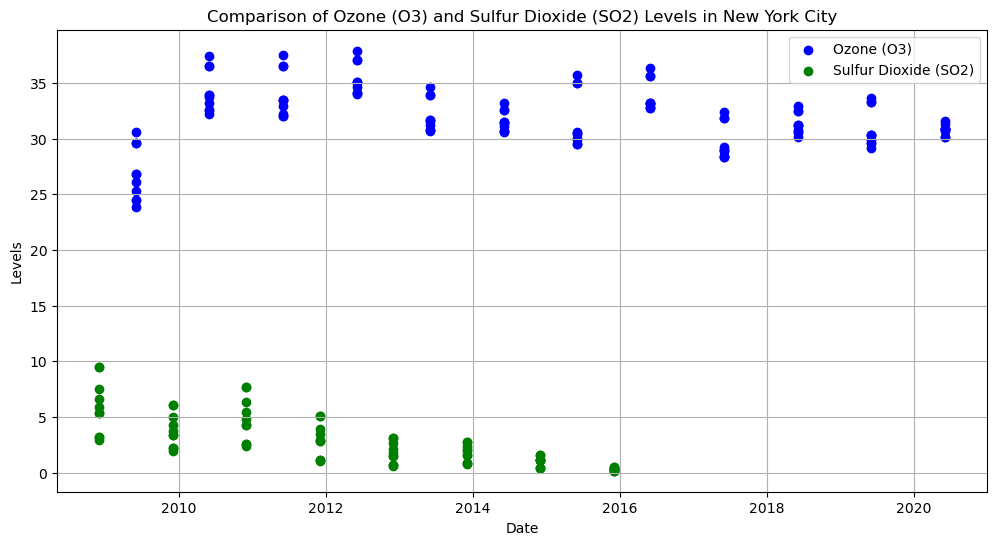

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
air_quality_data_new = pd.read_csv('Air_Quality.csv')

# Filter data for New York City and the available pollutants
nyc_data_o3 = air_quality_data_new[(air_quality_data_new['Geo Place Name'].str.contains('Coney Island|Bronx', na=False)) & (air_quality_data_new['Name'] == 'Ozone (O3)')]
nyc_data_so2 = air_quality_data_new[(air_quality_data_new['Geo Place Name'].str.contains('Coney Island|Bronx', na=False)) & (air_quality_data_new['Name'] == 'Sulfur Dioxide (SO2)')]

# Ensure the date format is consistent
nyc_data_o3['Start_Date'] = pd.to_datetime(nyc_data_o3['Start_Date'], errors='coerce')
nyc_data_so2['Start_Date'] = pd.to_datetime(nyc_data_so2['Start_Date'], errors='coerce')

# Drop rows with invalid dates
nyc_data_o3 = nyc_data_o3.dropna(subset=['Start_Date'])
nyc_data_so2 = nyc_data_so2.dropna(subset=['Start_Date'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(nyc_data_o3['Start_Date'], nyc_data_o3['Data Value'], color='blue', label='Ozone (O3)')
plt.scatter(nyc_data_so2['Start_Date'], nyc_data_so2['Data Value'], color='green', label='Sulfur Dioxide (SO2)')
plt.xlabel('Date')
plt.ylabel('Levels')
plt.title('Comparison of Ozone (O3) and Sulfur Dioxide (SO2) Levels in New York City')
plt.legend()
plt.grid(True)
plt.savefig('comparison_o3_so2_nyc.png')
plt.show()


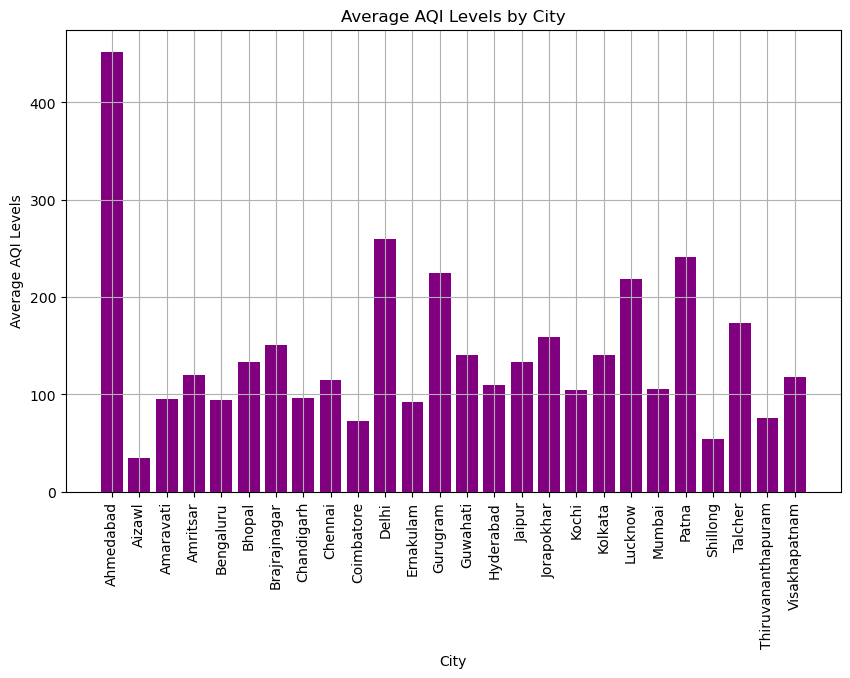

In [6]:
# Load the city day dataset
city_day_data = pd.read_csv('city_day.csv')

# Calculate average AQI for each city
average_aqi = city_day_data.groupby('City')['AQI'].mean().reset_index()

# Bar chart for average AQI levels by city
plt.figure(figsize=(10, 6))
plt.bar(average_aqi['City'], average_aqi['AQI'], color='purple')
plt.xlabel('City')
plt.ylabel('Average AQI Levels')
plt.title('Average AQI Levels by City')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig('average_aqi_by_city.png')
plt.show()


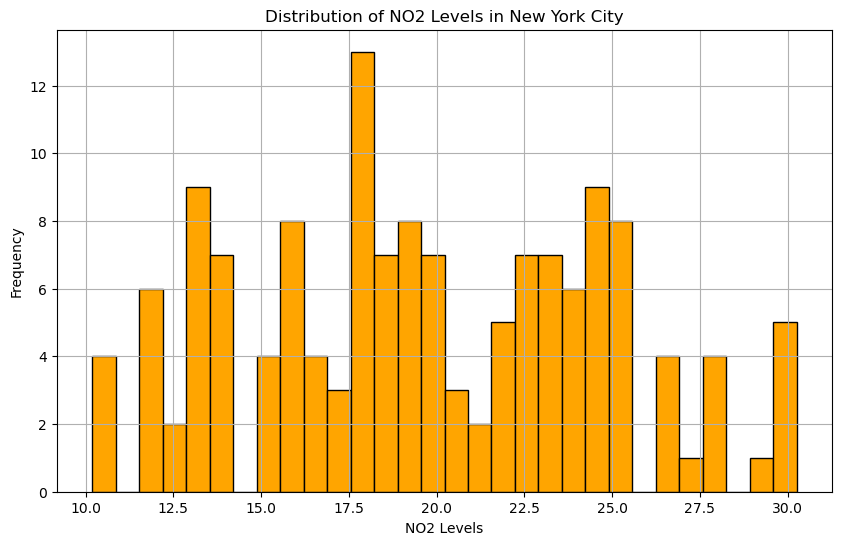

In [7]:
# Filter NYC data for NO2
nyc_no2_data = nyc_data[(nyc_data['Geo Place Name'].str.contains('New York', na=False)) & (nyc_data['Name'] == 'Nitrogen Dioxide (NO2)')]

# Histogram for NO2 levels in NYC
plt.figure(figsize=(10, 6))
plt.hist(nyc_no2_data['Data Value'], bins=30, color='orange', edgecolor='black')
plt.xlabel('NO2 Levels')
plt.ylabel('Frequency')
plt.title('Distribution of NO2 Levels in New York City')
plt.grid(True)
plt.savefig('no2_distribution_nyc.png')
plt.show()


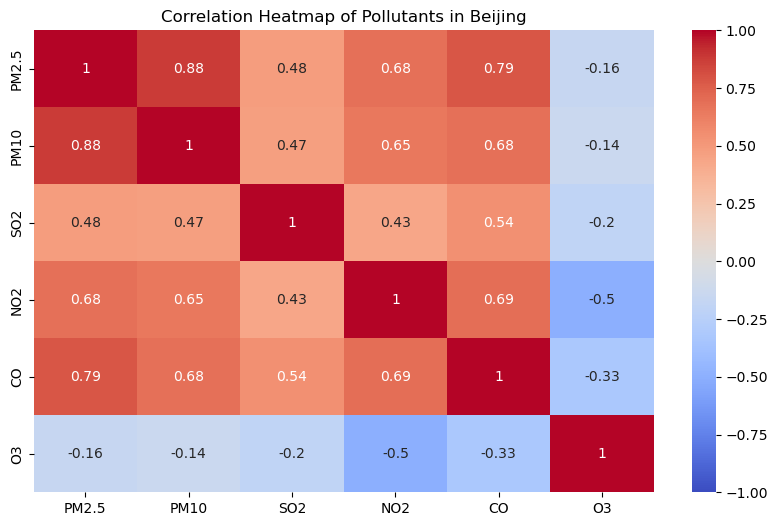

In [8]:
import seaborn as sns

# Calculate correlation matrix for pollutants
corr_matrix = beijing_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Pollutants in Beijing')
plt.savefig('correlation_heatmap_beijing.png')
plt.show()
